In the file **Ride_history.csv** you will find data on the rentals of Wroclaw City Bicycles - you can find current data with column names in Polish [here](https://www.wroclaw.pl/open-data/dataset/wrmprzejazdy_data). If you have problems with Polish letters, the file is using "Windows-1250" encoding.

Read the data from the file, and then select only those where the rental and return stations are the same and the rentals are shorter than 100 minutes. Show on the graph how many rentals of a given duration there were (first bar: rentals with a duration of one minute, the second - two minutes, etc.).

Rentals that start and end at the same station and last no more than three minutes are probably rentals of defective bikes, which the user returns as soon as they realize the problem. Draw a red line that separates rentals shorter and longer than 3 minutes.

Also give it an annotation explaining what this line is.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file_path = "../01_Data for plots/Ride_history.csv"
df = pd.read_csv(file_path, encoding="Windows-1250")

In [13]:
df.head(5)

,Check-out UID,Bike number,Check-out time,Check-in time,Check out dock,Check in dock,Ride duration
0,112512738,57243,2021-03-03 23:41:47,2021-03-04 00:00:34,Plac Grunwaldzki / Polaka,Undocked,19
1,112512783,57434,2021-03-03 23:46:14,2021-03-04 00:00:41,Bezpieczna/Jugosławiańska,Kurkowa / Dubois,15
2,112512778,650040,2021-03-03 23:45:30,2021-03-04 00:02:33,al. Kochanowskiego / Kopernika,Rondo Reagana,18
3,112512869,57441,2021-03-03 23:53:59,2021-03-04 00:05:08,Plac Świętego Macieja / Trzebnicka,Nowowiejska / Górnickiego,12
4,112512830,651044,2021-03-03 23:50:10,2021-03-04 00:07:12,Powstańców Śląskich/Orla,Szewska / Kazimierza Wielkiego,18


In [15]:
filtered_df = df[(df['Check out dock'] == df['Check in dock']) & (df['Ride duration'] < 100)]
duration_counts = filtered_df['Ride duration'].value_counts().sort_index()

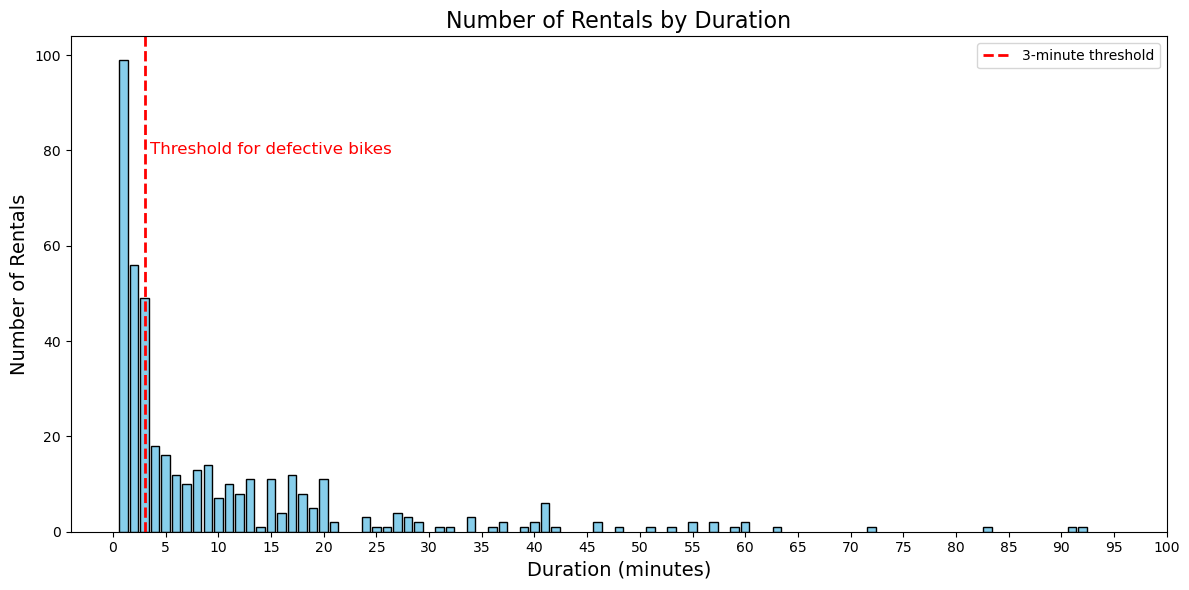

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, color='skyblue', edgecolor='black')

plt.axvline(x=3, color='red', linestyle='--', linewidth=2, label='3-minute threshold')
plt.text(3.5, max(duration_counts.values) * 0.8, 'Threshold for defective bikes', color='red', fontsize=12)

plt.title("Number of Rentals by Duration", fontsize=16)
plt.xlabel("Duration (minutes)", fontsize=14)
plt.ylabel("Number of Rentals", fontsize=14)
plt.xticks(range(0, 101, 5))
plt.legend()

plt.tight_layout()
plt.show()